# Homework 2

To be done in groups of 2 students.

# Pricing Diamonds


The dataset contains the following features.
- price : price of the dimaond in dollars.

- carat : weight of the diamond

- cut : quality of the cut

- color : color of the diamond, J (worst) to D (best)

- clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- x : length (mm) 

- y :  width (mm) 

- z : depth (mm) 

- depth : 2 * z / (x + y)

- table :  width of top of diamond relative to widest point



## Your job

- Try to understand the data, visualize it. You may use unsupervised learning methods at this stage.
- The main aim is then to predict, using supervised learning methods, the price of diamonds based on their different quality features.

## We want to see the following things

- Prediction results and mean squared error obtained on the test set for the methods you considered.
- A discussion about the impact of the hyperparameters of the methods on your predictions.
- A clear comparison between your solutions (a table, and/or plots comparing the results obtained with different methods).
- A discussion about the difficulties encountered if applicable.
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did efficient calibration of the methods and serious comparisons between different methods
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Hand in your assignment  before 09/11/20 23h55 :

- via Moodle for all Université de Paris students
- via email if Moodle not possible for Paris 1 students, subject [Machine Learning DM2], aurelie.fischer@univ-paris-diderot.fr


## Example of methods

Unsupervised learning methods and visualization :
- PCA
- k-means
- mixture models
- spectral clustering
...

Supervised learning methods :
- discriminant analysis
- logistic regression
- SVM
- regression trees
- bagging
- random forests
- boosting
- ...

# Notre travail

Marie Bétend et Félix Desmaretz
## Premieres visualisation des donnees


### Import des donnees

Nous commencons par importer les données et les nettoyer si besoin.


In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
models_path = "drive/My Drive/Colab Notebooks/models/"
data_path = "drive/My Drive/Colab Notebooks/data/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def save_cnn(model, history, num):
    model.save(os.path.join(models_path, f'model{num}_cnn.h5'))
    with open(os.path.join(models_path, f'model{num}_cnn_history.pkl'), 'wb') as f:
        pkl.dump(history.history, f)

def load_cnn(num):
    model = load_model(os.path.join(models_path, f'model{num}_cnn.h5'))
    with open(os.path.join(models_path, f'model{num}_cnn_history.pkl'), 'rb') as f:
        history = pkl.load(f)
    return (model, history)

In [ ]:
data = pd.read_csv(data_path + 'diamonds.csv')
data.head(n=10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Nous constatons qu'il y a des typles dans lesquels `x`, `y` ou `z` sont nuls ce qui ne fait pas forcément sens. Nous allons les enlever. La première colonne ne nous est pas utile, nous allons la supprimer également.

In [ ]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


C'est mieux ! Vérifions maintenant qu'aucun des tuples ne contient de valeurs NaN.

In [ ]:
data.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [ ]:
org_data = data.copy()

Nous allons garder une copie des données originales pour la suite.

### Liens entre le prix et les autres paramètres

Nous prédire le prix des diamants à partir de leurs caractéristiques. Pour cela nous commencons par étudier les liens qui existent entre ces paramètres et le prix des diamants.

Nous voyons que les prix des diamants sont assez étendus.

In [ ]:
print(np.unique(data['price']).shape)

(11597,)


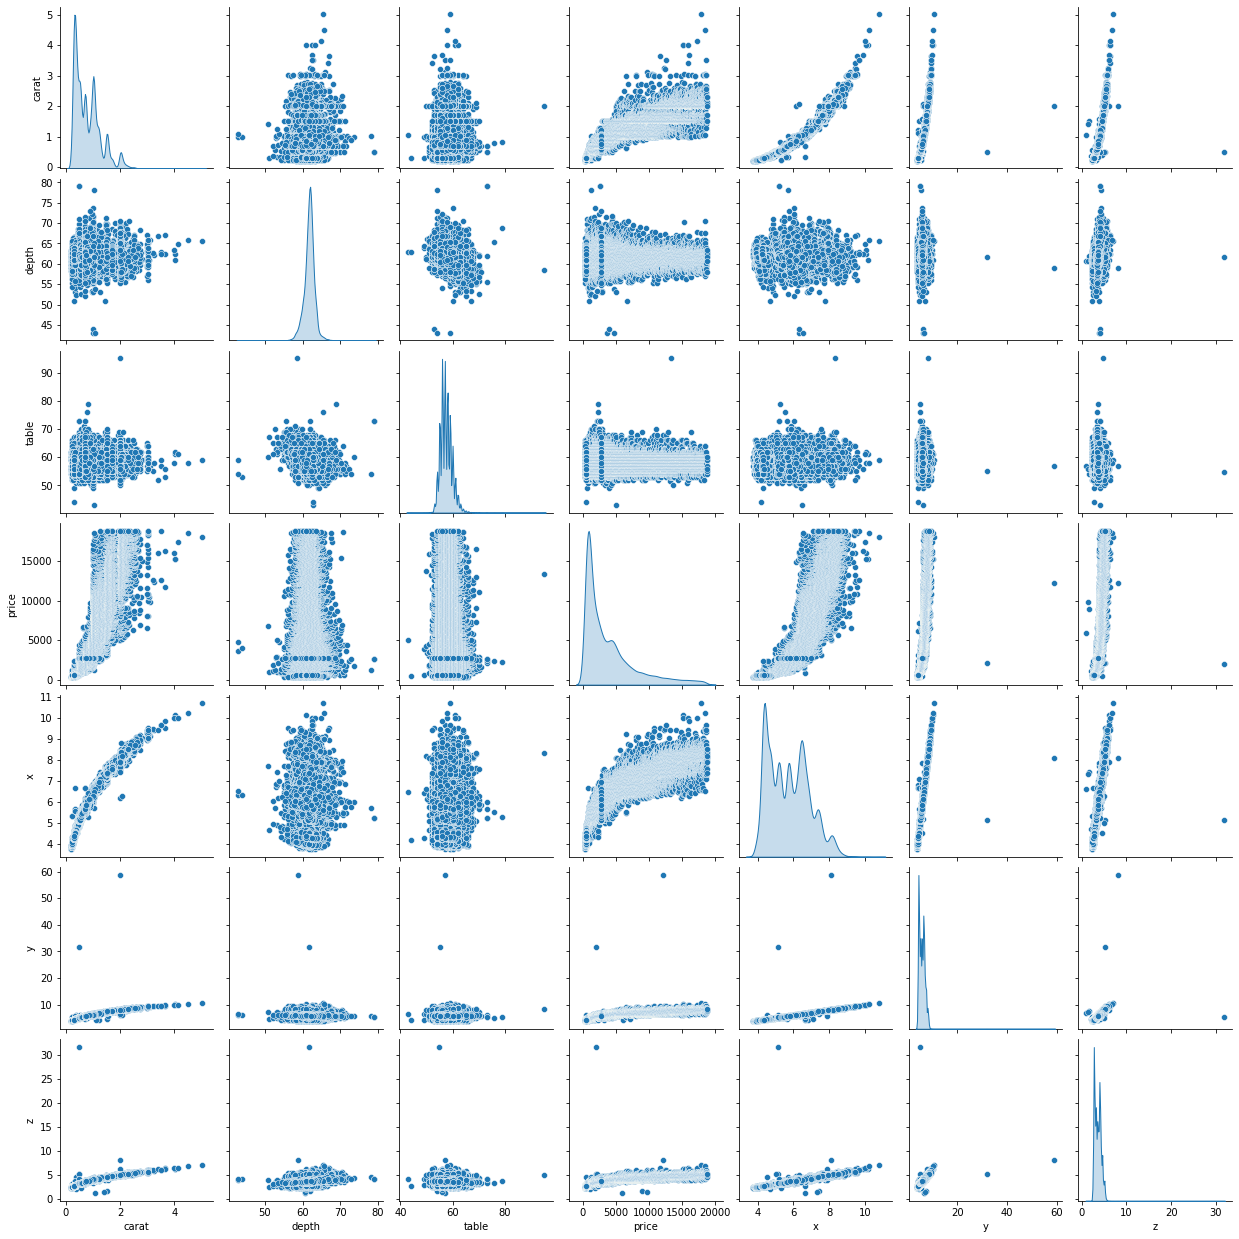

In [ ]:
sns.pairplot(data , diag_kind = 'kde')

Plusieurs constats : 
- Dans notre data set, la `depth` de nos diamant est surtout comprise entre 55 et 65 mm
- Le `carat` d'un diamant semble avoir un lien fort avec son `x`
- De meme que pour le `depth`, le table des diamants est assez concentrée : entre 50 et 70 mm environ
- Les `y` et les `z` sont moins hétérogenes que les `x`.
- Il semble exister un lien assez fort entre le prix et le carat d'un diamant
- Les dimensions `x`, `y`,`z` et le `carat` d'un diamant ont l'air également de s'influencer.

Observons les corrélations entre les différentes features pour confirmer les intuitions soulevées par le pairplot.

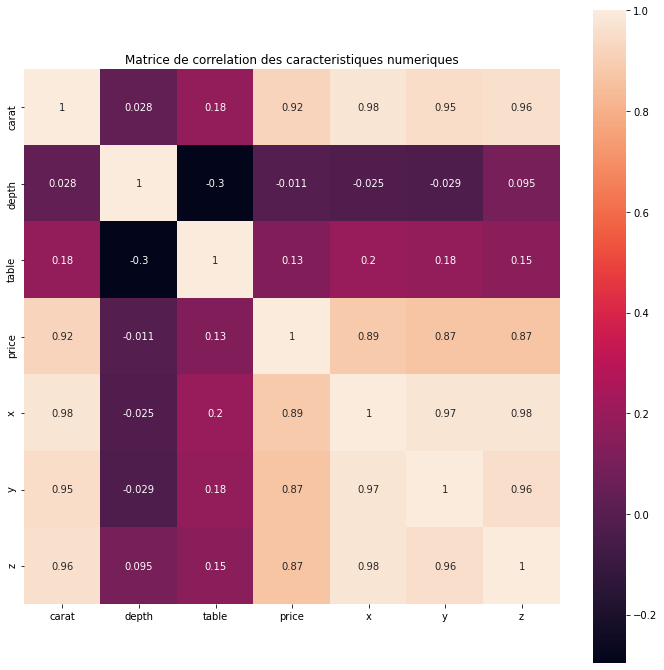

In [ ]:
corr_matrix = data.corr()

plt.subplots(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True, square = True)
plt.title("Matrice de correlation des caracteristiques numeriques")
plt.show()



Nous pouvons donc confirmer que le prix est surtout corrélé avec le `carat` et les dimensions `x`, `y` et `z` du diamant.
De plus les dimensions et le carat entres elles sont fortement corrélées.
Nous remarquons égelement que la profondeur d'un diamant et son prix son inversement corrélés.

Essayons de convertir les categories `cut`, `clarity` et `color` en numérique pour étudier leurs corrélations avec le prix.

In [ ]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

data['cut_label'] = data['cut']
data['color_label'] = data['color']
data['clarity_label'] = data['clarity']

data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_label,color_label,clarity_label
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2


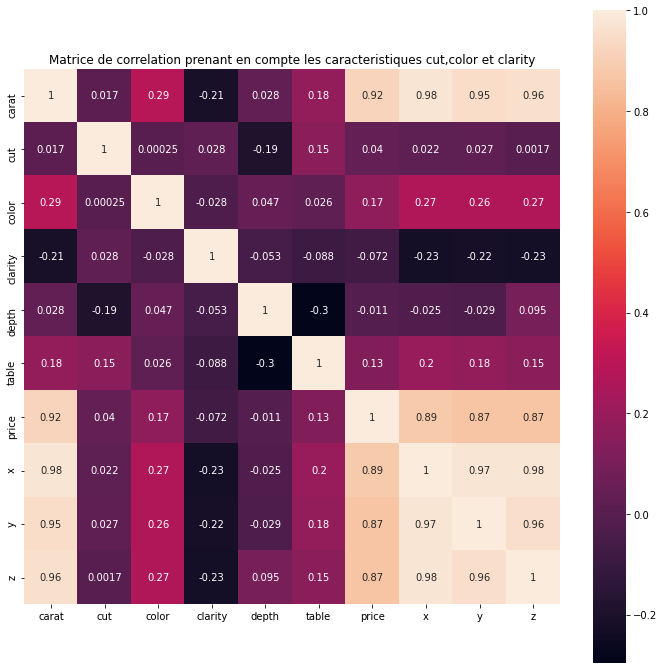

In [ ]:
corr_matrix = data.corr()

plt.subplots(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True, square=True)
plt.title("Matrice de correlation prenant en compte les caracteristiques cut,color et clarity")
plt.show()

Le prix semble peu corrélé à nos 3 paramètres catégoriques, mais attribuer un numéro a ces catégories n'est pas forcément représentatif et il n'est pas interessant de leur imposer un ordre, nous utiliserons des vecteurs one-hot dans la suite pour les représenter.


Comme le prix semble très corrélé aux dimension du diamant, nous créeons une nouvelle colonne _volume_.

In [ ]:
data["Volume"] = data['x']*data['y']*data['z']

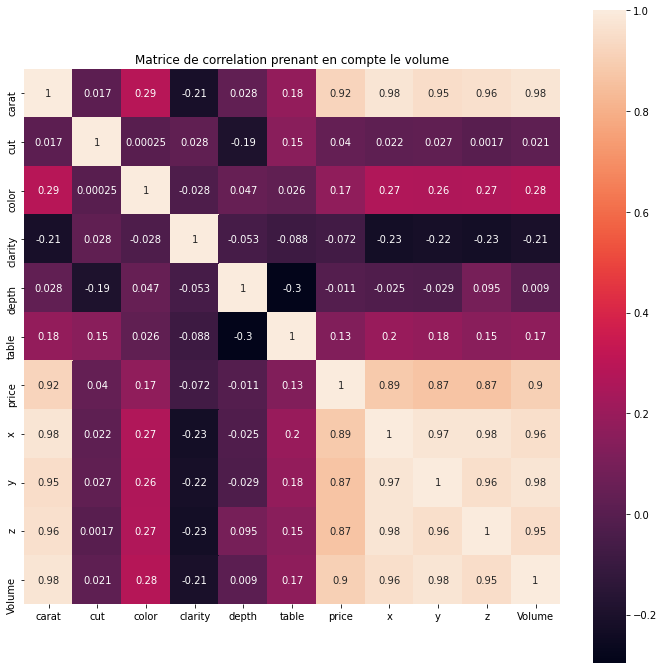

In [ ]:
corr_matrix = data.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True, square=True)
plt.title("Matrice de correlation prenant en compte le volume")
plt.show()

## PCA

Intéressons nous au PCA du jeu de données et leurs valeurs numériques

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [ ]:
pca = PCA(n_components=10)
reduced = pca.fit_transform(StandardScaler().fit_transform(data.iloc[:, list(range(10)) + [-1]].drop('price',axis=1)))
pca_df = pd.DataFrame(data = reduced, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])


In [ ]:
variance = pca.explained_variance_ratio_

for i in range(len(variance)):
  print("Compostante {} : {} %".format(i, round(variance[i], 4)*100))


Compostante 0 : 50.62 %
Compostante 1 : 14.31 %
Compostante 2 : 9.92 %
Compostante 3 : 8.73 %
Compostante 4 : 8.52 %
Compostante 5 : 6.68 %
Compostante 6 : 0.5599999999999999 %
Compostante 7 : 0.44 %
Compostante 8 : 0.21 %
Compostante 9 : 0.02 %


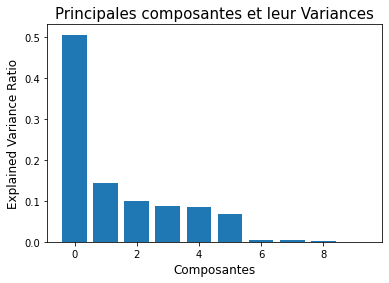

In [ ]:
plt.bar([i for i, _ in enumerate(variance)],variance)
plt.title('Principales composantes et leur Variances', fontsize=15)
plt.xlabel('Composantes',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()

Nous constatons que les 4 premières composantes expliquent environ 92,1% de la variance ce qui est suffisant pour nous. En fait nous nous contenterons d'étudier la composition des 3 premières composantes qui correspondent à environ 83,5% de la variance.

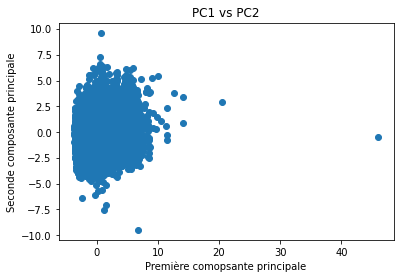

In [ ]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Première comopsante principale')
plt.ylabel('Seconde composante principale')
plt.title("PC1 vs PC2")
plt.show()

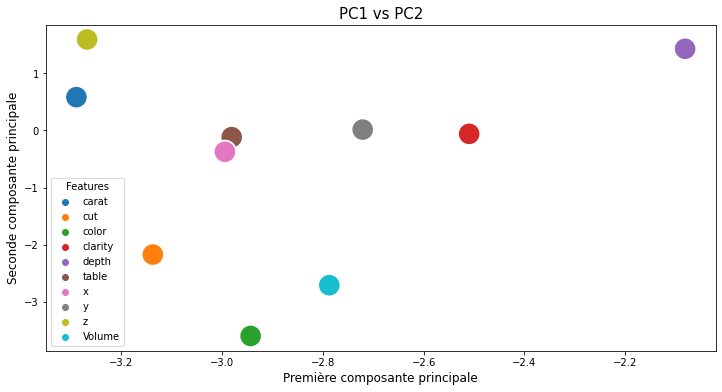

In [ ]:
colnames = list(data.iloc[:,list(range(10)) + [-1]].drop('price',axis=1).columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 
                          'PC8':pca.components_[7], 'PC9':pca.components_[8], 'PC10':pca.components_[9] })

#Visualize 2 main PCs
fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_df['PC1'], pca_df['PC2'],hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Première composante principale',fontsize=12)
plt.ylabel('Seconde composante principale',fontsize=12)
plt.show()


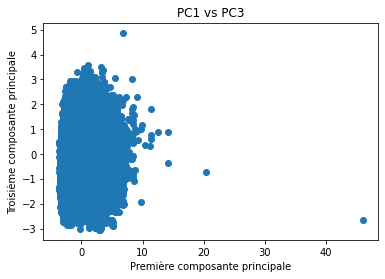

In [ ]:
plt.scatter(pca_df['PC1'], pca_df['PC3'])
plt.xlabel('Première composante principale')
plt.ylabel('Troisième composante principale')
plt.title("PC1 vs PC3")
plt.show()

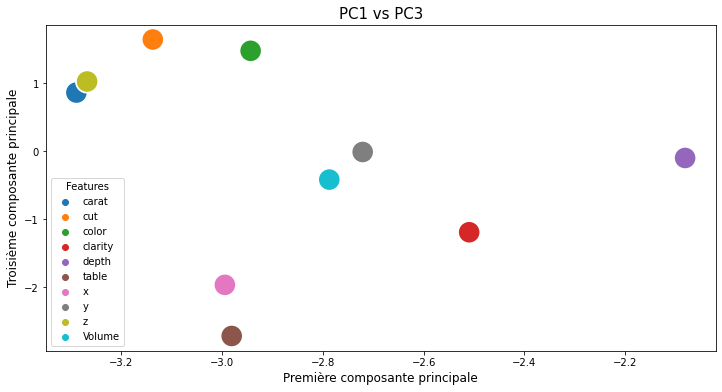

In [ ]:
fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_df['PC1'], pca_df['PC3'],hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC3',fontsize=15)
plt.xlabel('Première composante principale',fontsize=12)
plt.ylabel('Troisième composante principale',fontsize=12)
plt.show()

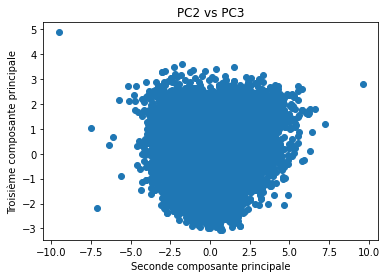

In [ ]:
plt.scatter(pca_df['PC2'], pca_df['PC3'])
plt.xlabel('Seconde composante principale')
plt.ylabel('Troisième composante principale')
plt.title("PC2 vs PC3")
plt.show()

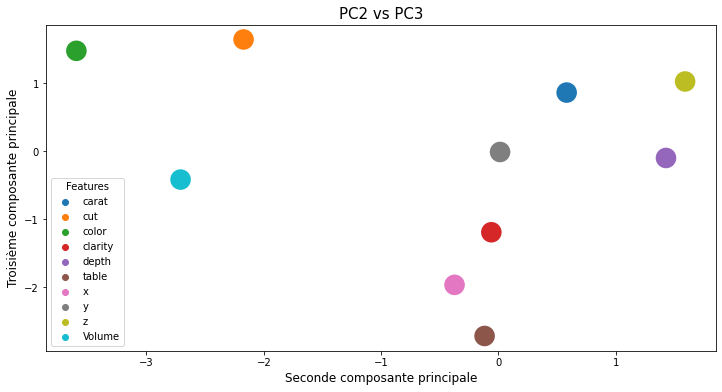

In [ ]:
fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_df['PC2'], pca_df['PC3'],hue=pca_data.Features,marker='o', s=500)
plt.title('PC2 vs PC3',fontsize=15)
plt.xlabel('Seconde composante principale',fontsize=12)
plt.ylabel('Troisième composante principale',fontsize=12)
plt.show()

Nous constatons que les caractéristiques `carat` et `z` sont très présentes dans la deuxieme composante. Dans la troisieme composante, nous notons l'impact de `color`et `cut`. La première composante est inversement corrélées aux autres features.

### Clustering a l'aide de k-means

Nous allons comparer les clusters obtenus avec k-means et les categories de prix réels des diamants. Après plusieurs tests la meilleure visualisation demontrant un certain nombre de catégorie se fait pour k=4.

Nous commencons donc par créer 4 categories de prix.


In [ ]:
data["price_cat"] = np.ceil(data["price"] / 1500)
data["price_cat"].where(data["price_cat"] < 4, 4.0, inplace = True)

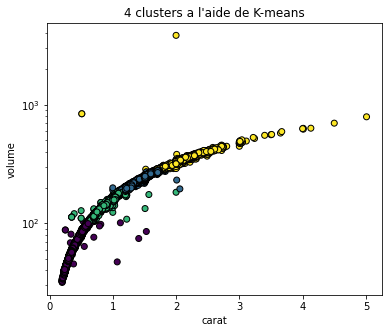

In [ ]:
# En 2D

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
np.random.seed(5)

iris = datasets.load_iris()
X = data.iloc[:,list(range(10)) + [-2]].drop('price',axis=1)

methode = KMeans(n_clusters=4)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
methode.fit(X)
labels = methode.labels_

ax.scatter(X.iloc[:, 0], X.iloc[:, -1],
               c=labels.astype(np.float), edgecolor='k')
ax.set_yscale('log')
ax.set_xlabel('carat')
ax.set_ylabel('volume')
ax.set_title("4 clusters a l'aide de K-means")

fig.show()


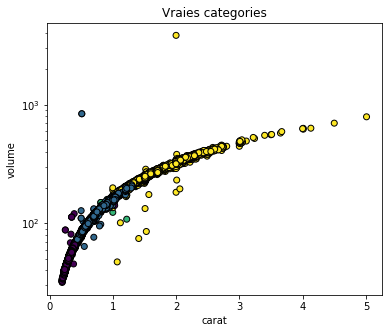

In [ ]:
# EN 2D
y=data['price_cat']
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.scatter(X.iloc[:, 0], X.iloc[:, -1],
               c=y, edgecolor='k')
ax.set_yscale('log')
ax.set_xlabel('carat')
ax.set_ylabel('volume')
ax.set_title("Vraies categories")
fig.show()

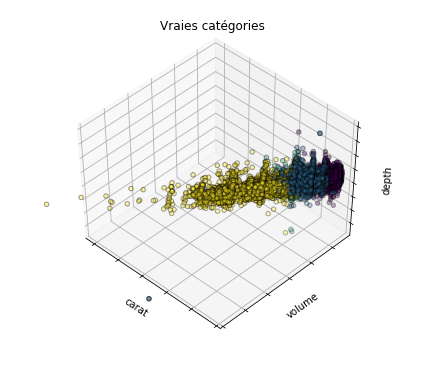

In [ ]:
#En 3D
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
y= data['price_cat']

ax.scatter(X.iloc[:, 0], X.iloc[:, -1], X.iloc[:, 4], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_ylim3d(30,600)
ax.set_xlabel('carat')
ax.set_ylabel('volume')
ax.set_zlabel('depth')
ax.set_title('Vraies catégories')
ax.dist = 12

fig.show()

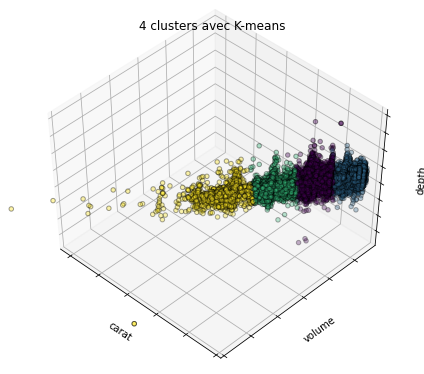

In [ ]:
#En 3D
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig,rect=[0, 0, .95, 1], elev=48, azim=134)
methode.fit(X)
labels = methode.labels_

ax.scatter(X.iloc[:, 0], X.iloc[:, -1], X.iloc[:, 4],
               c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_ylim3d(30,600)
ax.set_xlabel('carat')
ax.set_ylabel('volume')
ax.set_zlabel('depth')
ax.set_title("4 clusters avec K-means")

fig.show()

Nous obtenons des clusters proches de la réalité, bien que les clusters correspondant aux prix médiants soient plus démarqués avec k-means qu'ils ne le sont réellement.

Nous allons désormais essayer de prédire le prix des diamants avec différents modèles.

## Prédiction 

### Création du set de test



In [ ]:
data = org_data.copy()

La répartition des diamants selon leur `carat` était très hétérogène.

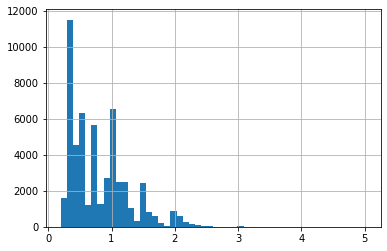

In [ ]:
data['carat'].hist(bins=50)
plt.show()

Or c'est la feature avec la plus grande correlation au prix. Ainsi, si nous créions un échantillon de test et de validation sans plus de pré-traîtement, nous pourrions nous retrouver avec un biais d'échantillonage. Nous procédons donc à un échantillonage stratifié.

Nous allons diviser l'échantillon en 5 catégories. En sachant que la majorité des diamants ont un carat entre 0.3 et 1.5, nous pouvons créer ces 5 catégories en divisant l'échantillon par pallier de 0.35 (ce qui semble être la valeur donnant le résultat le plus satisfaisant après plusieurs essais) et toutes les catégories supérieures à 5 seront fusionnées avec cette dernière.


In [ ]:
# Création des catégories
data["carat_cat"] = np.ceil(data["carat"] / 0.35)

# Ceux au dessus de la catégorie 5 sont fusionné avec celle-ci.
data["carat_cat"].where(data["carat_cat"] < 5, 5.0, inplace = True)
data["carat_cat"].value_counts()

2.0    16104
3.0    13393
1.0    11058
4.0     6964
5.0     6401
Name: carat_cat, dtype: int64

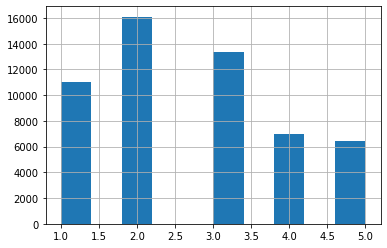

In [ ]:
data['carat_cat'].hist()
plt.show()

Nous utiliserons 20% des donnes initiales pour créer un set de test.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 404)

for train_index, test_index in split.split(data, data['carat_cat']):
    strat_data_train, strat_data_test = data.iloc[train_index], data.iloc[test_index]

In [ ]:
org_strat_data_train, org_strat_data_test = strat_data_train, strat_data_test

Nous pouvons désormais nous defaire de la colonne `carat_cat`.

In [ ]:
strat_data_train, strat_data_test = strat_data_train.drop(['carat_cat'], axis=1), strat_data_test.drop(['carat_cat'], axis=1)

In [ ]:
org_strat_data_train, org_strat_data_test = strat_data_train, strat_data_test
strat_data_train, strat_data_test = org_strat_data_train.copy(), org_strat_data_test.copy()

In [ ]:
strat_data_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
978,0.81,Ideal,G,SI2,62.2,57.0,2894,5.96,6.00,3.72
33555,0.41,Ideal,J,VS1,60.2,57.0,830,4.85,4.81,2.91
31296,0.32,Premium,D,VS2,61.7,59.0,758,4.38,4.43,2.72
1020,0.71,Premium,E,VS2,59.6,60.0,2902,5.85,5.80,3.47
35255,0.30,Very Good,G,IF,61.0,62.0,895,4.32,4.34,2.64


Comme nous l'avions annoncé plus tôt nous allons utiliser des vecteurs one-hot pour representer les caracteristiques categoriques.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = strat_data_train.drop(['price'], axis=1)
df_labels = strat_data_train['price'].copy()
df_nums = df.drop(['cut', 'color', 'clarity'], axis=1)
df_cats = df[['cut', 'color', 'clarity']]

In [ ]:
from sklearn.compose import ColumnTransformer

nums = list(df_nums)
cats = ['cut', 'color', 'clarity']

pipeline = ColumnTransformer([
    ("nums", StandardScaler(), nums), 
    ("cats", OneHotEncoder(), cats)
])

In [ ]:
df_out = pipeline.fit_transform(df)
pd.DataFrame(df_out).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.025067,0.308854,-0.203784,0.203449,0.232277,0.254041,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.817166,-1.074601,-0.203784,-0.787133,-0.810336,-0.893002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.006668,-0.037009,0.691470,-1.206569,-1.143271,-1.162061,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.185491,-1.489638,1.139097,0.105283,0.057048,-0.099984,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.048780,-0.521219,2.034351,-1.260114,-1.222124,-1.275349,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeles

Nous allons donc maintenant comparer differents modeles pour prédire les prix des diamants.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import cluster
from sklearn.cluster import SpectralClustering



In [ ]:
X_test = strat_data_test.drop("price", axis = 1).copy()
y_test = strat_data_test["price"].copy()

models_rmse = [] # Racine de l'erreur quadratique moyenne des modèles
cvs_rmse_mean = [] # Moyenne des racines des erreurs quadratique moyennes de la validation croisée
tests_rmse = [] # # Racine de l'erreur quadratique moyenne des tests
tests_accuracy = [] # Précision des modèles
models = [] # Nom des modèles
computed_models = [] # Sorties de modèles pour pouvoir les grapher



In [ ]:

from tabulate import tabulate

def compute_model(model_name, model, df = df_out, labels = df_labels,
                              models_rmse = models_rmse, cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse, computed_models=computed_models,
                              tests_accuracy = tests_accuracy, pipeline = pipeline, X_test = X_test,
                              y_test = y_test, cv = True):
    ## Compute Model

    # Fit & predictions
    model.fit(df, labels)
    predictions = model.predict(df)
    
    # MSE
    model_mse = mean_squared_error(labels, predictions)
    model_rmse = np.sqrt(model_mse)
    
    # Validation croisée
    cv_score = cross_val_score(model, df, labels, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()
    
    ## Compute Test

    X_test_prepared = pipeline.transform(X_test)
    
    # Fit & predictions
    model.fit(X_test_prepared, y_test)
    test_predictions = model.predict(X_test_prepared)
    
    # MSE
    test_model_mse = mean_squared_error(y_test, test_predictions)
    test_model_rmse = np.sqrt(test_model_mse)
    
    # Précision
    test_accuracy = round(model.score(X_test_prepared, y_test) * 100, 2)
    
    ##  Ajouts aux listes
    models.append(model_name)
    models_rmse.append(model_rmse)
    cvs_rmse_mean.append(cv_rmse_mean)
    tests_rmse.append(test_model_rmse)
    tests_accuracy.append(test_accuracy)
    computed_models.append((
            (df_labels, model.predict(df_out)), 
            (y_test, model.predict(X_test_prepared)))
        )

    print(tabulate(
        [
            ['Model RMSE', model_rmse], 
            ['Model CV-RMSE', cv_rmse_mean], 
            ['Test RMSE', test_model_rmse],
            ['Accuracy', test_accuracy]
         ],
    ))

def plot_model_computation(cm):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(*cm[0])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title('Model')
    lims = (
        0,
        min(20_000, plt.xlim()[1])
    )
    plt.plot(lims, lims, "k--")

    plt.subplot(1, 2, 2)
    plt.scatter(*cm[1])
    plt.xlabel("Actual")
    lims = (
        0,
        min(20_000, plt.xlim()[1])
    )
    plt.plot(lims, lims, "k--")
    plt.title('Test')
    plt.show()

##### Linear Regression

Nous commençons par une simple régression linéaire pour nous donner un point de comparaison.

-------------  -------
Model RMSE     1139.2
Model CV-RMSE  1177.03
Test RMSE      1070.05
Accuracy         92.63
-------------  -------


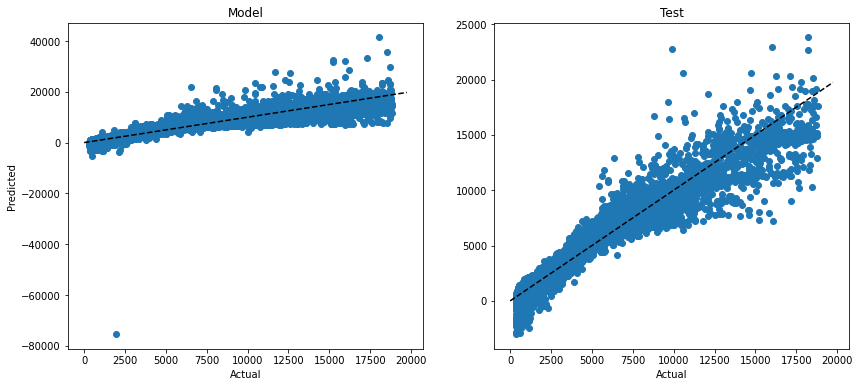

In [ ]:
lin_reg = LinearRegression(normalize = True)
compute_model("Linear Regression", lin_reg)
plot_model_computation(computed_models[-1])



Cette première approche nous donne des résultats qui sont plutôt bons.

##### Lasso Regression

-------------  -------
Model RMSE     1416.32
Model CV-RMSE  1400.57
Test RMSE      1205.49
Accuracy         90.65
-------------  -------


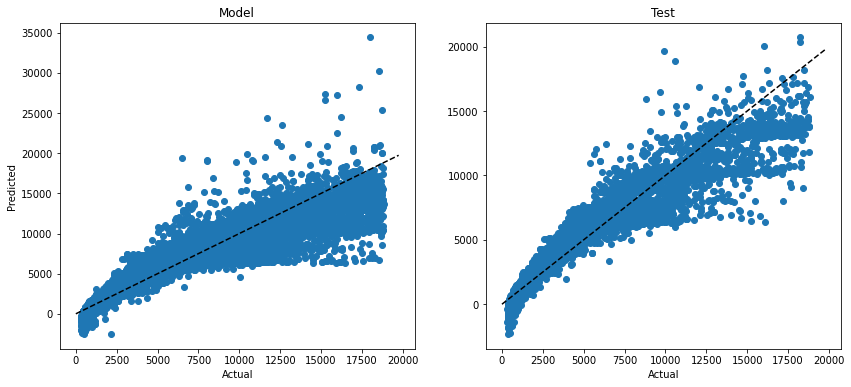

In [ ]:
lasso_reg = Lasso(normalize = True)
compute_model("Lasso Regression", lasso_reg)
plot_model_computation(computed_models[-1])

##### Ridge Regression

-------------  -------
Model RMSE     1777.65
Model CV-RMSE  1779.27
Test RMSE      1729.55
Accuracy         80.75
-------------  -------


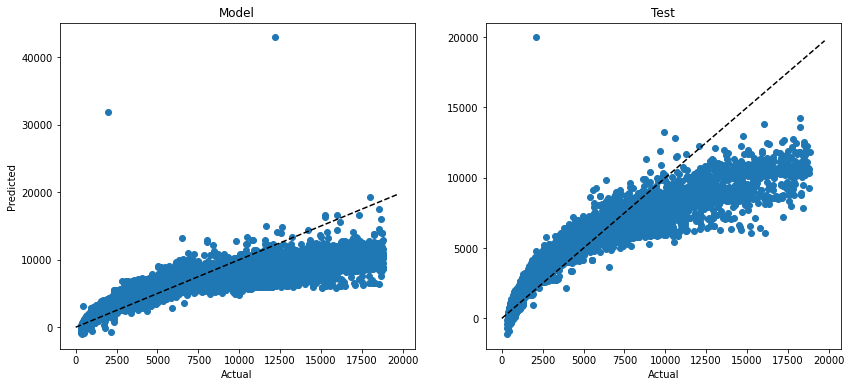

In [ ]:
ridge_reg = Ridge(normalize = True)
compute_model("Ridge Regression", ridge_reg)
plot_model_computation(computed_models[-1])


Les régressions Ridge et Lasso nous donnent des résultats moins bons que la régression linéaire simple. La différence est encore plus nette pour la régression Ridge. Les deux régressions sur-estiment puis sous-estiment le prix des diamants.

##### KNN regression

-------------  -------
Model RMSE     616.025
Model CV-RMSE  780.181
Test RMSE      771.987
Accuracy        96.16
-------------  -------


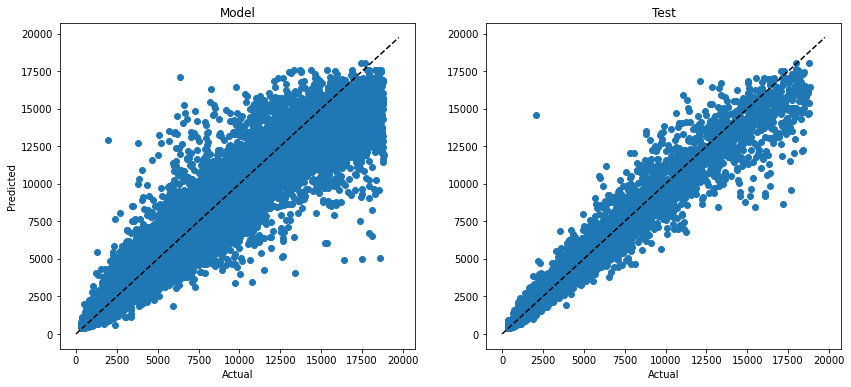

In [ ]:
knn_reg = KNeighborsRegressor()
compute_model("KNN Regression", knn_reg)
plot_model_computation(computed_models[-1])

Ici, la régression KNN nous donne de meilleurs résultats sur l'ensembles des critères de mesure.

##### AdaBoost Regression

-------------  -------
Model RMSE     1574.17
Model CV-RMSE  1500.24
Test RMSE      1487.52
Accuracy         85.76
-------------  -------


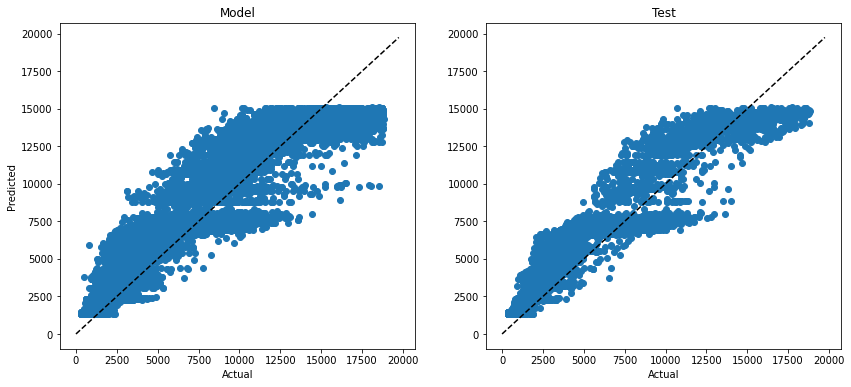

In [ ]:
ada_reg = AdaBoostRegressor(n_estimators = 100)
compute_model("AdaBoost Regression", ada_reg)
plot_model_computation(computed_models[-1])

AdaBoost n'est pas satisfaisant.

##### GradientBoost Regression

-------------  -------
Model RMSE     1159.51
Model CV-RMSE  1165.7
Test RMSE      1122.46
Accuracy         91.89
-------------  -------


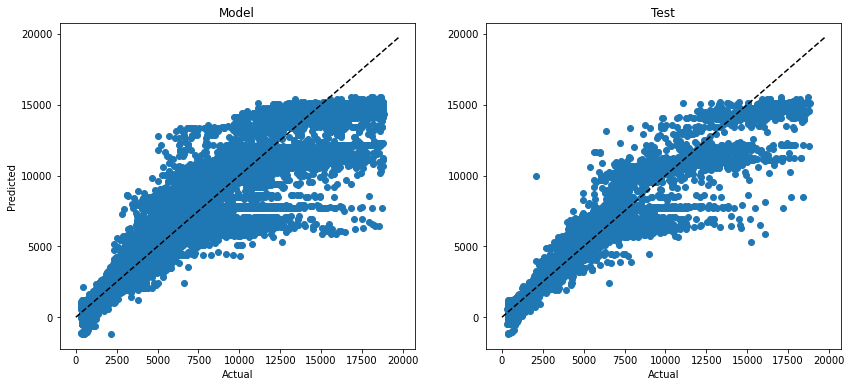

In [ ]:
grad_reg = GradientBoostingRegressor(n_estimators = 150, learning_rate = 0.1,
                                     max_depth = 1, random_state = 404, loss = 'ls')
compute_model("GradientBoosting Regression", grad_reg)
plot_model_computation(computed_models[-1])

Nous remarquons que pour les deux méthodes de boosting, nos modèles saturent pour les grandes valeurs. Et, après essais, nous constatons une amélioration sur l'ensemble des critères de mesures lorsque nous augmentons le nombre d'estimateurs. Mais cette amélioration est marginale et n'est pas suffisant pour concurencer la Régression KNN.

##### Decision Tree Regression

-------------  ---------
Model RMSE       6.61204
Model CV-RMSE  753.341
Test RMSE        2.61612
Accuracy       100
-------------  ---------


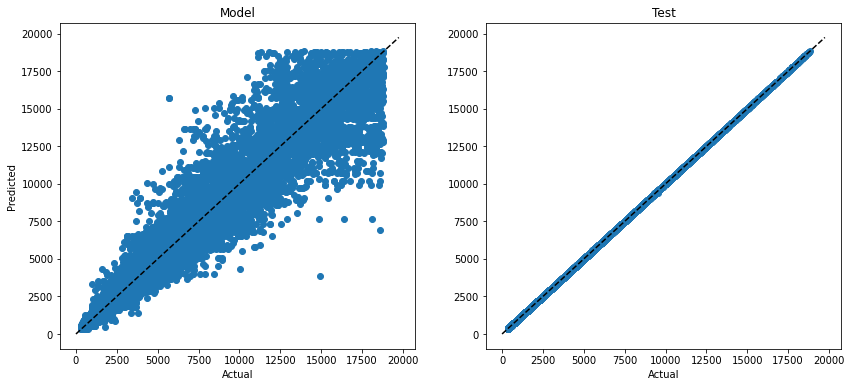

In [ ]:
tree_reg = DecisionTreeRegressor(random_state = 404)
compute_model("Decision Tree Regression", tree_reg)
plot_model_computation(computed_models[-1])

Étonnament, nous obtenons une précision de 100%. C'est la meilleure précision que nous ayons obtenu et que nous obtiendrons par la suite. Un bémol subsiste, la moyenne des racines des erreurs quadratique moyennes de la validation croisée sur le modèle est toujours importante ($ > 753$). C'est dû à une surapprentissage lié au calcul du modèle à partir de peu d'arbres.

##### Bagging Regression

-------------  -------
Model RMSE     245.26
Model CV-RMSE  577.673
Test RMSE      274.448
Accuracy        99.52
-------------  -------


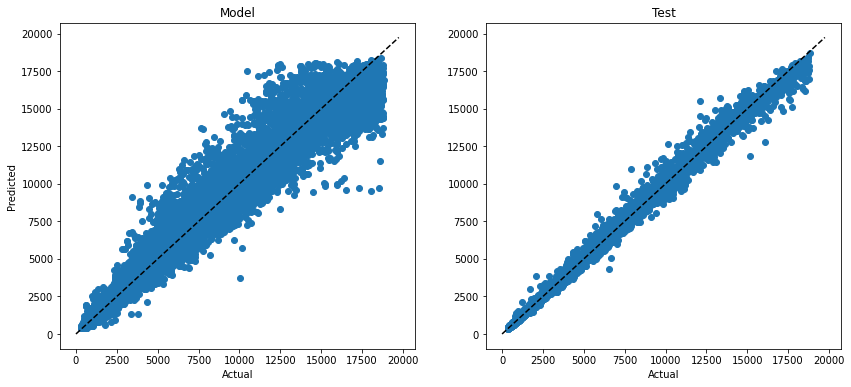

In [ ]:
bag_reg = BaggingRegressor()
compute_model("Bagging Regression", bag_reg)
plot_model_computation(computed_models[-1])

Le bagging nous donne une excellente précision et une plus grande robustesse au changement du jeu de données par rapport au modèle précédent. Sa précision est inférieure à la régression par arbre de décision mais nous préférerons ce modèle au précédent pour sa meilleur moyenne des erreurs quadratiques moyennes pour la validation croisée.




##### Random Forest Regression

-------------  -------
Model RMSE     241.597
Model CV-RMSE  573.88
Test RMSE      274.151
Accuracy        99.52
-------------  -------


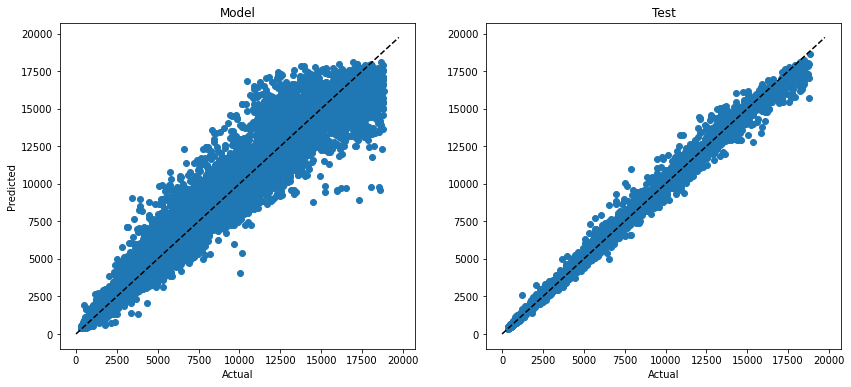

In [ ]:
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 404)
compute_model("Random Forest Regression", forest_reg)
plot_model_computation(computed_models[-1])

Nous noterons les mêmes remarques que pour la régression par bagging. Les deux modèles se valent.

##### Extra Trees Regression

-------------  -------
Model RMSE     199.136
Model CV-RMSE  532.116
Test RMSE      224.932
Accuracy        99.67
-------------  -------


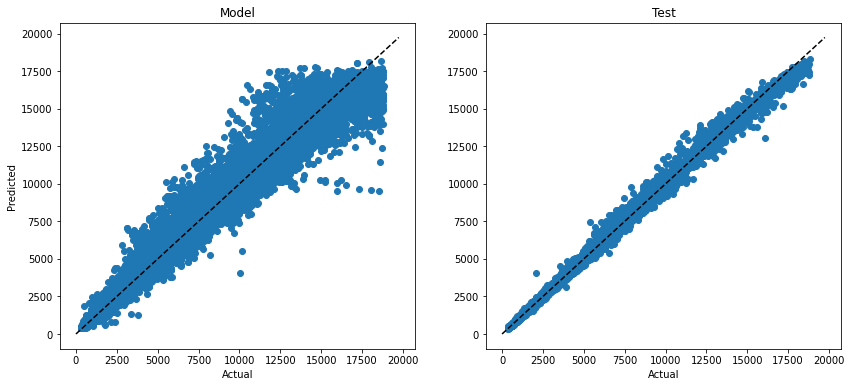

In [ ]:
ext_reg = ExtraTreesRegressor(bootstrap=True, random_state=404)
compute_model("Extra Trees Regression", ext_reg)
plot_model_computation(computed_models[-1])

Nous avons encore une amélioration par rapport aux 2 précédents modèles sur l'ensemble des critères de mesure. Nous n'observons pas d'amélioration notable sur les performances de ce modèle lors des modifications des hyper-paramètres.

##### Comparaison des modeles

In [ ]:
for e in [models, models_rmse, cvs_rmse_mean, tests_rmse, tests_accuracy, computed_models]:
 e.pop(9)

comparison = pd.DataFrame({ "Algorithm": models, "Model RMSE": models_rmse, "CV RMSE Mean": cvs_rmse_mean,
                              "Test RMSE": tests_rmse, "Test Accuracy": tests_accuracy })
comparison.sort_values(by = "Test Accuracy", ascending = False)

,Algorithm,Model RMSE,CV RMSE Mean,Test RMSE,Test Accuracy
6,Decision Tree Regression,6.612039,753.340967,2.616118,100.00
9,Extra Trees Regression,199.135953,532.116249,224.931971,99.67
7,Bagging Regression,245.259758,577.672935,274.448093,99.52
8,Random Forest Regression,241.597270,573.880342,274.151224,99.52
3,KNN Regression,616.024649,780.180989,771.987227,96.16
0,Linear Regression,1139.195076,1177.026808,1070.045612,92.63
5,GradientBoosting Regression,1159.508360,1165.696498,1122.459391,91.89
1,Lasso Regression,1416.318649,1400.570054,1205.489067,90.65
4,AdaBoost Regression,1574.170080,1500.241229,1487.518498,85.76
2,Ridge Regression,1777.645391,1779.268234,1729.550002,80.75


Nous consatons que nous pouvons obtenir d'excellentes performances. Si on compare les deux meilleurs modèles, c'est à dire _Decision Tree Regression_ et _Extra Trees Regression_, nous avons un compromis entre la robustesse et la précision du modèle. En effet, la _CV RMSE Mean_, la moyenne des racines des erreurs quadratiques moyennes lors de la validation croisée, nous donne une idée du comportement du modèle pour des jeux de données moins équilibrés. Nous considérons cette information comme la _robustesse_ d'un modèle.

Pour ce notebook, nous considérons que le modèle le plus satisfaisant est l'_Extra Trees Regression_ car, bien que le "meilleur" modèle soit plus précis d'un peu plus de 0.32% , nous gagnons beaucoup en robustesse.

Nous trouverons ci-desssous un récapitulatif visuel des différents modèles testés.

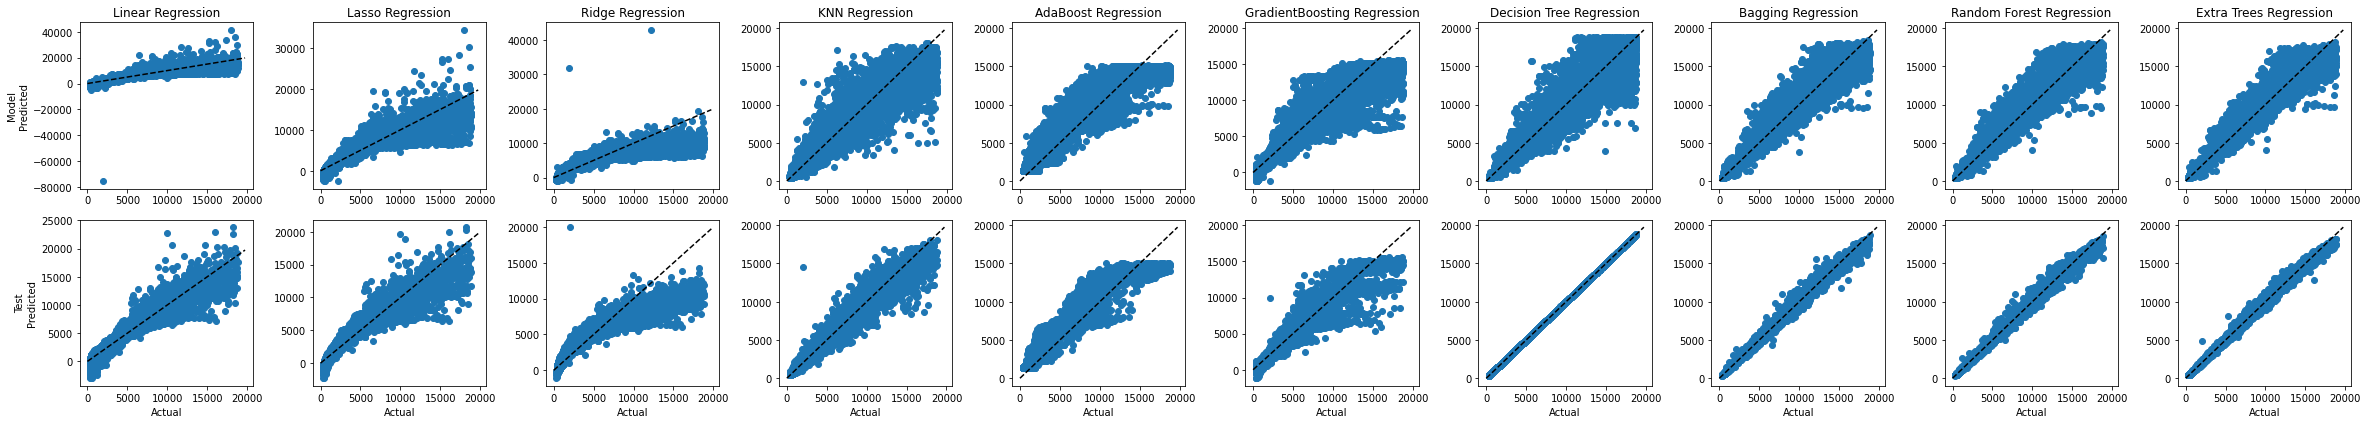

In [ ]:
l = len(computed_models)

plt.figure(figsize=(3.3 * l, 6))
lims = (0, 20_000)

for (i, d) in enumerate(computed_models):
    plt.subplot(2, l, i + 1)
    plt.scatter(*d[0])
    plt.title(models[i])
    lims = (
        0,
        min(20_000, plt.xlim()[1])
    )
    plt.plot(lims, lims, "k--")
    if i == 0:
        plt.ylabel("Model\nPredicted")

    plt.subplot(2, l, (i + 1) + l)
    plt.scatter(*d[1])
    plt.xlabel("Actual")
    lims = (
        0,
        min(20_000, plt.xlim()[1])
    )
    plt.plot(lims, lims, "k--")
    if i == 0:
        plt.ylabel("Test\nPredicted")
    
plt.tight_layout()
plt.show()

## Conclusion

Pour conclure, nous avons déterminé que les paramètres les plus importants pour prédire le prix d'un diamant était leurs dimensions `x`,`y`,`z` et leurs `carat`. 
Nous avons ensuite comparer les clusters obtenus par k-means et les catégories réelles de prix des diamants, qui étaient semblables mais non identiques aux vrais prix.

Nous avons ensuite tester différents modèles et constaté que nous pouvons prédire le prix de diamants en fonction de leur features avec une grande précision. Ce faisant, nous avons aussi commenté le compromis robustesse/précision sur les deux meilleurs modèles et conclut qu'en l'absence d'écart important dans la précision, nous préférons un modèle plus robuste à un modèle plus précis.